In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)


valid_datagen = ImageDataGenerator(
    rescale=1. / 255,
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    directory=r"./trainSet/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=69
)

Found 276 images belonging to 15 classes.


In [4]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"./testSet/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=69
)

Found 81 images belonging to 15 classes.


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


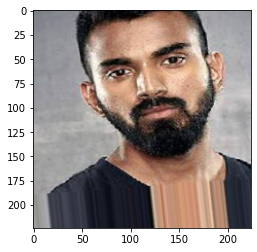

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


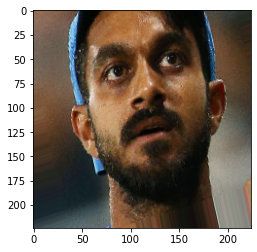

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


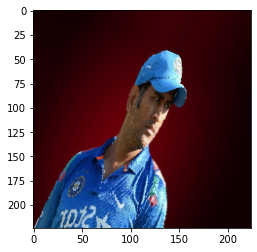

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


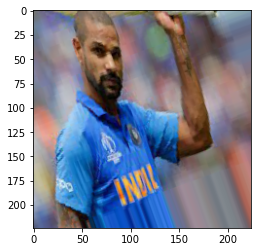

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


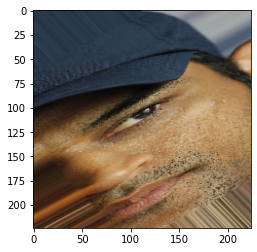

In [5]:
from matplotlib import pyplot as plt
x_batch, y_batch = next(train_generator)
for i in range (5):
    print(y_batch[i])
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


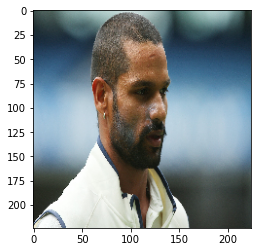

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


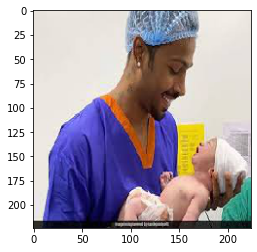

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


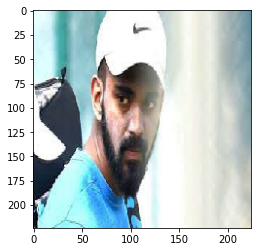

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


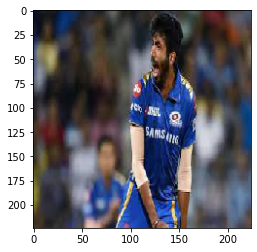

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


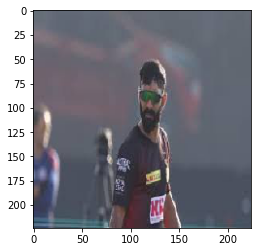

In [6]:
x_batch, y_batch = next(valid_generator)
for i in range (5):
    print(y_batch[i])
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [7]:
from keras.applications import MobileNetV2
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50

from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras import Model

base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights='imagenet')

# base_model.get_layer('block1_conv1').trainable = False
# base_model.get_layer('block1_conv2').trainable = False
# base_model.get_layer('block2_conv1').trainable = False
# base_model.get_layer('block2_conv2').trainable = False

for layer in base_model.layers:
    if np.random.rand(1)%2:
        layer.trainable = False
    

flat = Flatten()(base_model.layers[-1].output)
dense1 = Dense(256, activation='relu')(flat)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(15, activation='softmax')(dense2)
model = Model(inputs=base_model.inputs, outputs=output)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [8]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,validation_data = valid_generator,epochs=50, verbose=1)

Epoch 1/50
9/9 [==============================] - 4s 482ms/step - loss: 18.7202 - accuracy: 0.0725 - val_loss: 14.5457 - val_accuracy: 0.0370
Epoch 2/50
9/9 [==============================] - 3s 360ms/step - loss: 10.9133 - accuracy: 0.1812 - val_loss: 7.7957 - val_accuracy: 0.1852
Epoch 3/50
9/9 [==============================] - 3s 357ms/step - loss: 4.8236 - accuracy: 0.2609 - val_loss: 5.1323 - val_accuracy: 0.1235
Epoch 4/50
9/9 [==============================] - 3s 356ms/step - loss: 3.1754 - accuracy: 0.3261 - val_loss: 4.6446 - val_accuracy: 0.2099
Epoch 5/50
9/9 [==============================] - 3s 360ms/step - loss: 2.3080 - accuracy: 0.4275 - val_loss: 3.7355 - val_accuracy: 0.2469
Epoch 6/50
9/9 [==============================] - 3s 364ms/step - loss: 1.7123 - accuracy: 0.5145 - val_loss: 3.5641 - val_accuracy: 0.2840
Epoch 7/50
9/9 [==============================] - 3s 357ms/step - loss: 1.5142 - accuracy: 0.5725 - val_loss: 3.7647 - val_accuracy: 0.2469
Epoch 8/50
9/9 [=

In [10]:
all_generator = train_datagen.flow_from_directory(
    directory=r"./images/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=69
)

Found 576 images belonging to 15 classes.


In [11]:
base_model = InceptionV3(include_top=False, input_shape=(224, 224, 3),weights='imagenet')

# base_model.get_layer('block1_conv1').trainable = False
# base_model.get_layer('block1_conv2').trainable = False
# base_model.get_layer('block2_conv1').trainable = False
# base_model.get_layer('block2_conv2').trainable = False

for layer in base_model.layers:
    if np.random.rand(1)%2:
        layer.trainable = False
    

flat = Flatten()(base_model.layers[-1].output)
dense1 = Dense(256, activation='relu')(flat)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(15, activation='softmax')(dense2)
model2 = Model(inputs=base_model.inputs, outputs=output)

model2.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [21]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3),weights='imagenet')

# base_model.get_layer('block1_conv1').trainable = False
# base_model.get_layer('block1_conv2').trainable = False
# base_model.get_layer('block2_conv1').trainable = False
# base_model.get_layer('block2_conv2').trainable = False

for layer in base_model.layers:
        layer.trainable = False
    

flat = Flatten()(base_model.layers[-1].output)
dense1 = Dense(256, activation='relu')(flat)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(15, activation='softmax')(dense2)
model3 = Model(inputs=base_model.inputs, outputs=output)

model3.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [23]:
model3.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(all_generator,epochs=30)

Epoch 1/30
18/18 [==============================] - 7s 381ms/step - loss: 4.0730 - accuracy: 0.0642
Epoch 2/30
18/18 [==============================] - 7s 407ms/step - loss: 2.7851 - accuracy: 0.1128
Epoch 3/30
18/18 [==============================] - 7s 394ms/step - loss: 2.5537 - accuracy: 0.1684
Epoch 4/30
18/18 [==============================] - 7s 389ms/step - loss: 2.2922 - accuracy: 0.3056
Epoch 5/30
18/18 [==============================] - 7s 396ms/step - loss: 2.2519 - accuracy: 0.2882
Epoch 6/30
18/18 [==============================] - 7s 399ms/step - loss: 2.1669 - accuracy: 0.3368
Epoch 7/30
18/18 [==============================] - 7s 405ms/step - loss: 2.0577 - accuracy: 0.3351
Epoch 8/30
18/18 [==============================] - 7s 402ms/step - loss: 1.9611 - accuracy: 0.3802
Epoch 9/30
18/18 [==============================] - 7s 399ms/step - loss: 1.8442 - accuracy: 0.4410
Epoch 10/30
18/18 [==============================] - 7s 389ms/step - loss: 1.7526 - accuracy: 0.4670

In [13]:
model2.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model2.fit(all_generator,epochs=70)

Epoch 1/70
18/18 [==============================] - 7s 369ms/step - loss: 17.8388 - accuracy: 0.0781
Epoch 2/70
18/18 [==============================] - 7s 363ms/step - loss: 4.8791 - accuracy: 0.1632
Epoch 3/70
18/18 [==============================] - 7s 363ms/step - loss: 3.0374 - accuracy: 0.2604
Epoch 4/70
18/18 [==============================] - 7s 370ms/step - loss: 2.3772 - accuracy: 0.3455
Epoch 5/70
18/18 [==============================] - 7s 370ms/step - loss: 2.1767 - accuracy: 0.3872
Epoch 6/70
18/18 [==============================] - 7s 371ms/step - loss: 2.0415 - accuracy: 0.4080
Epoch 7/70
18/18 [==============================] - 7s 368ms/step - loss: 2.0128 - accuracy: 0.4184
Epoch 8/70
18/18 [==============================] - 7s 366ms/step - loss: 1.8112 - accuracy: 0.5052
Epoch 9/70
18/18 [==============================] - 7s 362ms/step - loss: 1.6280 - accuracy: 0.5417
Epoch 10/70
18/18 [==============================] - 7s 365ms/step - loss: 1.8524 - accuracy: 0.498

In [ ]:
model.save('cricketers')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('./cricketers/')

In [24]:
from keras_preprocessing import image
from matplotlib import pyplot as plt

def pred(path):
    img = image.load_img(path, target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model3.predict(images)
    players = ['bhuvneshwar_kumar','dinesh_karthik','hardik_pandya','jasprit_bumrah','k._l._rahul','kedar_jadhav','kuldeep_yadav','mohammed_shami','ms_dhoni','ravindra_jadeja','rohit_sharma','shikhar_dhawan','vijay_shankar','virat_kohli','yuzvendra_chahal']
    print(players[list(classes[0]).index(max(list(classes[0])))])
    
def pred2(img):
#     plt.imshow(img)
#     plt.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    players = ['bhuvneshwar_kumar','dinesh_karthik','hardik_pandya','jasprit_bumrah','k._l._rahul','kedar_jadhav','kuldeep_yadav','mohammed_shami','ms_dhoni','ravindra_jadeja','rohit_sharma','shikhar_dhawan','vijay_shankar','virat_kohli','yuzvendra_chahal']
#     print(players[list(classes[0]).index(max(list(classes[0])))])
    return players[list(classes[0]).index(max(list(classes[0])))]

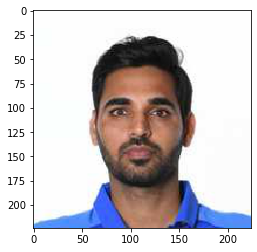

kedar_jadhav


In [30]:
pred('./bhuvneshwar-kumar.jpg')

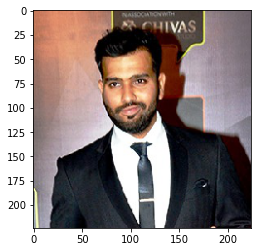

rohit_sharma


In [27]:
pred('./rohit.jpg')

In [ ]:
import cv2

camera = cv2.VideoCapture(1)

while True:
    success, img = camera.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('haarcascade.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    img2 = img.copy()
    
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        img2 = img2[y-70:y+h+70, x-70:x+w+70]

    img2 = cv2.resize(img2,(224,244))
    img2rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    txt = pred2(img2rgb)
    cv2.putText(img, txt,(30,30),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2, cv2.LINE_AA)
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == ord('t'):
        cv2.destroyAllWindows()
        camera.release()
        break